# Objective : Understanding the results of hierarchical clustering

# Question  : Implement Ward's method for Mall data and draw you conclusions

In [1]:
import pandas as pd
malldata=pd.read_csv("MallCustomers.csv")
malldata.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df=malldata.iloc[0:10,2:5]
df

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [3]:
print(malldata)

     CustomerID   Genre  Age  Income   Score
0             1    Male   19       15     39
1             2    Male   21       15     81
2             3  Female   20       16      6
3             4  Female   23       16     77
4             5  Female   31       17     40
..          ...     ...  ...      ...    ...
195         196  Female   35      120     79
196         197  Female   45      126     28
197         198    Male   32      126     74
198         199    Male   32      137     18
199         200    Male   30      137     83

[200 rows x 5 columns]


In [4]:
#malldata.iloc[:,2:5].values

# Perform Hierarchical clustering using Income and Score columns

In [5]:
# Created a two - dimensional array for clustering
X=malldata.iloc[:,[3,4]].values # INCOME AND SCORE COLUMNS
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Analysing the number of clusters

In [6]:
import scipy.cluster.hierarchy as sch

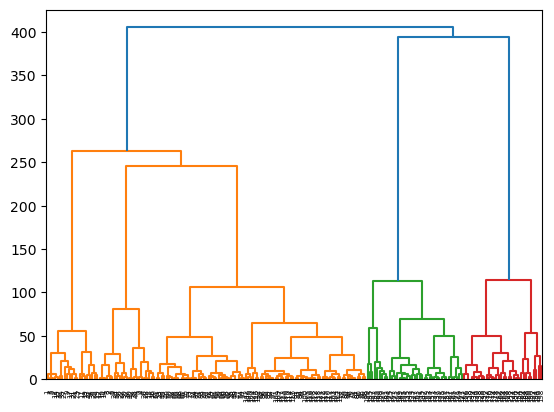

In [7]:
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))

# There are three clusters (three groups of customers)

In [8]:
import matplotlib.pyplot as plt

# Identify the membership of customers with respect to the three clusters

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [11]:
y_hc=hc.fit_predict(X)  # predicted memberships 

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [12]:
print(y_hc==1)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False  True False
 False False  True False  True False  True False  True False False False
  True False False False  True False  True False  True False  True False
  True False  True False False False  True False  T

# Drawing conclusions about different groups using visualizations

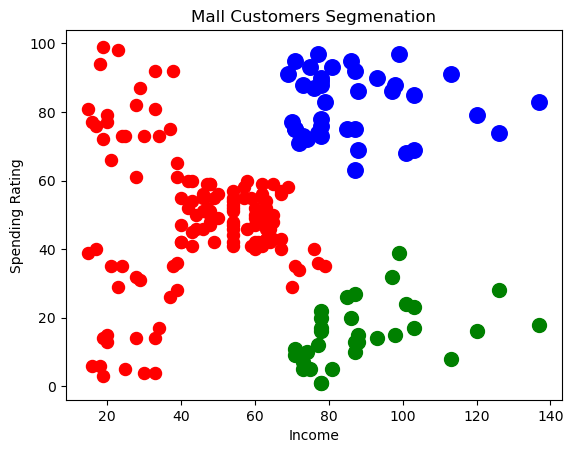

In [13]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],c='red',s=75) # plot values of first cluster members
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],c='green',s=100) # plot values of second cluster members
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],c='blue',s=125) # plot values of third cluster members
# X[y_hc==0,0] gives the first column of X of those rows satisfying the condition y_hc==0
# X[y_hc==0,1] gives the second column of X of those rows satisfying the condition y_hc==0
plt.xlabel("Income")
plt.ylabel("Spending Rating")
plt.title("Mall Customers Segmenation")
plt.show()

# About the clusters
## Cluster 1: Low Income -  Average Rated Customers
## Cluster 2 : High Income - Customers with Low rating
## Cluster 3 : High Income - Highly Rated Customers